In [1]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats.stats import pearsonr

In [8]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  

In [6]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [26]:
ML_curr= pd.read_pickle("../data/processed/ML_current_with_anomalies.pkl")
ML_volt= pd.read_pickle("../data/processed/ML_voltage_with_anomalies.pkl") 

#### Correlazione tra il numero di outlier in current e voltage

Text(0, 0.5, 'n_voltage_outliers')

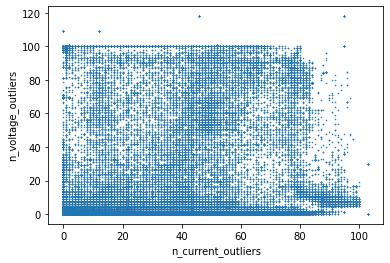

In [ ]:
plt.scatter(df["%volt_anomalies"],df["%current_anomalies"],s=0.3)
plt.xlabel("n_current_outliers")
plt.ylabel("n_voltage_outliers")

In [ ]:
pearsonr(df["%volt_anomalies"],df["%current_anomalies"])

(0.49545113608682534, 0.0)

In [ ]:
linregress(df["%volt_anomalies"],df["%current_anomalies"])

LinregressResult(slope=0.5136995781619378, intercept=0.14296809160482304, rvalue=0.49545113608682495, pvalue=0.0, stderr=0.0022401220938321528, intercept_stderr=0.08723724179293664)

Sembrerebbe esserci una moderata correlazione tra le due dimensioni (0.5 circa)

Considerando però che il numero di outlier è già un risultato approssimativo non possiamo affermare con certezze che a numerose anomalie nei valori di tensione corrispondano numerose anomalie nella corrente (o viceversa).

## Analisi anomalie di Voltage

In [30]:
# creazione df con solo le feature che interessano current
df_volt=df.drop(["index","n_current_outliers","%current_anomalies"],axis=1).join(ML_volt[["iForest_volt","LOF_volt","SVM_volt"]])

VoltageCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [139, 752, 1329, 1687, 1897, 2037, 2098, 2107,...   
           2019-09-17 17:56:07  [134, 755, 1309, 1661, 1888, 2056, 2140, 2140,...   
           2019-09-17 18:05:02  [134, 758, 1298, 1652, 1897, 2065, 2124, 2124,...   
           2019-09-17 18:42:46  [138, 767, 1328, 1682, 1906, 2061, 2139, 2148,...   
           2019-09-17 18:59:36  [130, 745, 1300, 1646, 1854, 2028, 2114, 2114,...   

                                                                     CurrentCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [302, 1999, 3574, 4694, 5512, 6148, 6542, 6815...   
           2019-09-17 17:56:07  [303, 2002, 3549, 4702, 5551, 6340, 6886, 7189...   
           2019-09-17 18:05:02  [305, 2017, 3607, 4738, 5656, 6389, 6848, 7154...   
           2019-09-17 18:42:46  [333, 2033, 3641, 4795, 5614, 6312, 6767, 7040...   
           2019-09-17 18:59:36  [302, 1996, 3569, 4719, 5536, 6262, 6837, 7109...   

                                voltage_drop  voltage_spike  \
spotName   TimeStamp                                          
60000_0_00 2019-09-17 17:56:02         False          False   
           2019-09-17 17:56:07         False          False   
           2019-09-17 18:05:02         False          False   
           2019-09-17 18:42:46         False          False   
           2019-09-17 18:59:36         False          False   

                                n_voltage_outliers  %volt_anomalies  \
spotName   TimeStamp                                                  
60000_0_00 2019-09-17 17:56:02                  27                6   
           2019-09-17 17:56:07                  29                7   
           2019-09-17 18:05:02                   9                2   
           2019-09-17 18:42:46                  30                7   
           2019-09-17 18:59:36                  31                7   

                                iForest_volt  LOF_volt  SVM_volt  
spotName   TimeStamp                                              
60000_0_00 2019-09-17 17:56:02             1         1         1  
           2019-09-17 17:56:07             1         1         1  
           2019-09-17 18:05:02             1         1         1  
           2019-09-17 18:42:46             1         1         1  
           2019-09-17 18:59:36             1         1         1

### Plot delle curve per specfico spotname

In [94]:
val_indice=df_volt.loc[['60185_0_00']]
val_indice.columns

Index(['VoltageCurve', 'CurrentCurve', 'voltage_drop', 'voltage_spike',
       'n_voltage_outliers', '%volt_anomalies', 'iForest_volt', 'LOF_volt',
       'SVM_volt'],
      dtype='object')

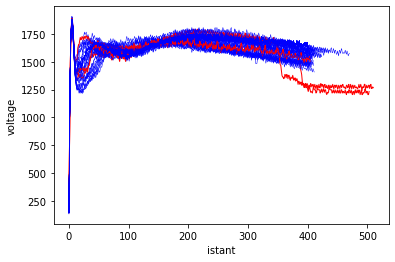

In [106]:
import matplotlib.pyplot as plt
plt.xlabel("istant")
plt.ylabel("voltage")
for i in range(50):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  

## Analisi anomalie di Current

In [ ]:
# creazione df con solo le feature che interessano current
df_curr=df.drop(["index","VoltageCurve","voltage_drop","voltage_spike","n_voltage_outliers","%volt_anomalies"],axis=1).join(ML_curr[["iForest_curr","LOF_curr","SVM_curr"]])
df_curr.head()

CurrentCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [302, 1999, 3574, 4694, 5512, 6148, 6542, 6815...   
           2019-09-17 17:56:07  [303, 2002, 3549, 4702, 5551, 6340, 6886, 7189...   
           2019-09-17 18:05:02  [305, 2017, 3607, 4738, 5656, 6389, 6848, 7154...   
           2019-09-17 18:42:46  [333, 2033, 3641, 4795, 5614, 6312, 6767, 7040...   
           2019-09-17 18:59:36  [302, 1996, 3569, 4719, 5536, 6262, 6837, 7109...   

                                n_current_outliers  %current_anomalies  \
spotName   TimeStamp                                                     
60000_0_00 2019-09-17 17:56:02                  20                   5   
           2019-09-17 17:56:07                   9                   2   
           2019-09-17 18:05:02                   0                   0   
           2019-09-17 18:42:46                   5                   1   
           2019-09-17 18:59:36                  13                   3   

                                iForest_curr  LOF_curr  SVM_curr  
spotName   TimeStamp                                              
60000_0_00 2019-09-17 17:56:02             1         1         1  
           2019-09-17 17:56:07             1         1         1  
           2019-09-17 18:05:02             1         1         1  
           2019-09-17 18:42:46             1         1         1  
           2019-09-17 18:59:36             1         1         1

### Plot delle curve per specfico spotname

In [108]:
val_indice=df_curr.loc[['60185_0_00']]
val_indice.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

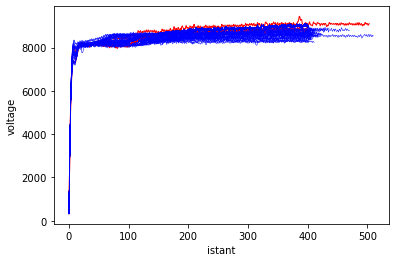

In [110]:
plt.xlabel("istant")
plt.ylabel("voltage")
for i in range(100):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)
plt.show()